In [1]:
import numpy as np
from numpy.fft import rfft, irfft, rfftfreq
import matplotlib.pyplot as plt
N=1024
%matplotlib inline

In [2]:
Nc=4096
da=np.random.normal(0,1,(Nc+1)*N)

In [3]:
def genofs (c,ofs,periodic=False):
    a=da[c*N:c*N+N]
    b=da[c*N+ofs:c*N+ofs+N]
    if periodic and ofs>0:
        b[-ofs:]=a[:ofs]
    return a,b

In [4]:
def getFFTS(a,b,ofs):
    fa,fb=rfft(a),rfft(b)
    ff=rfftfreq(N)
    ## phase rotate fb to fa
    fb*=np.exp(-2.*np.pi*1j*ofs*ff)
    ## we can now calculate cross-correlation coefficient
    ##r=(abs(fa*np.conj(fb)))/np.sqrt(fa*np.conj(fa)*fb*np.conj(fb))
    diff=(fa-fb)
    psdiff=abs(diff**2)/2
    psavg=N
    return ff,psdiff/psavg,fa*np.conj(fb),0.5*(fa*np.conj(fa)+fb*np.conj(fb))

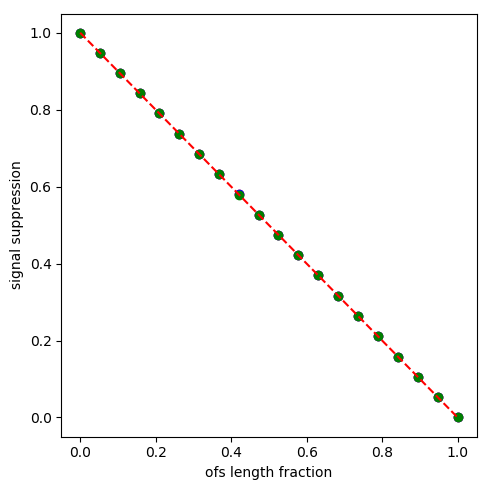

In [7]:
def interestingplot(ofsl):
    plt.figure(figsize=(5,5),dpi=100)
    for ofs in ofsl:
        da=np.random.normal(0,1,(Nc+1)*N)
        ofs=np.int(ofs)
        l=[]
        l1,l2=[],[]
        for c in range(Nc):
            a,b=genofs(c,ofs,False)
            ff,x,xps,xpt=getFFTS(a,b,ofs)
            l.append(x)
            l1.append(xps)
            l2.append(xpt)
        l1,l2=np.real(np.array(l1)),np.real(np.array(l2))
        #print (l1,l2)
        l=l1.mean()/l2.mean()
        plt.plot(ofs/N,l,'ro')
        l=(l1.mean(axis=0)/l2.mean(axis=0)).mean() #.mean(axis=0) gives mean power spectra
        plt.plot(ofs/N,l,'bo')
        l=(l1.mean(axis=1)/l2.mean(axis=1)).mean() # mean(axis=1) gives the mean spectrum as a function of time
        plt.plot(ofs/N,l,'go')
        #l=(l1/l2).mean()
        #plt.plot(ofs/N,l,'yo')

        #plt.plot(ofs/N,(1j*l).mean(),'ro')
    x=np.linspace(ofsl[0],ofsl[-1]/N,100)
    #plt.plot(x,1-4*x,'r--')
    plt.plot(x,(1-x),'r--')
    plt.ylabel('signal suppression')
    plt.xlabel('ofs length fraction')
    #plt.ylim(0,1)
    
#plt.figure(figsize=(2,2))
interestingplot(np.linspace(0,N,20))
plt.tight_layout()
plt.savefig('suppression.png')

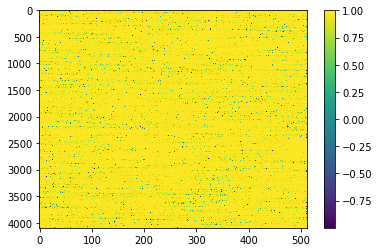

In [6]:
l,l1,l2=[],[],[]
da=np.random.normal(0,1,(Nc+1)*N)
ofs=10
for c in range(Nc):
    a,b=genofs(c,ofs,False)
    ff,x,xps,xpt=getFFTS(a,b,ofs)
    l.append(x)
    l1.append(xps)
    l2.append(xpt)
l1,l2=np.real(np.array(l1)),np.real(np.array(l2))
plt.imshow(l1/l2,aspect='auto')
plt.colorbar()


# 